# Лабораторная работа по нейроинформатике №6

Выполнил: _Коростелев Д.В._ Группа: _М8О-408Б-18_ Вариант: _11_


#### Используемые пакеты

In [1]:
#!pip install neurolab
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import neurolab as nl

### Задание 1

 Построить и обучить слой Кохонена, который будет содержать координаты центров 8
сформированных кластеров.

Реализуем функцию nngenc в Python 3

In [2]:
def nngenc(X, clusters, points, deviation):
    from sklearn.datasets import make_blobs
    return make_blobs(
        n_samples=clusters*points, cluster_std=deviation,
        n_features=2, centers=clusters, center_box=X, 
        return_centers=True, random_state=177
    )

Формируем случайный набор точек

In [3]:
X = (0, 1.5)
clusters = 8
points = 10
deviation = 0.1
x, y, centers = nngenc(X, clusters, points, deviation)

Изобразим множество

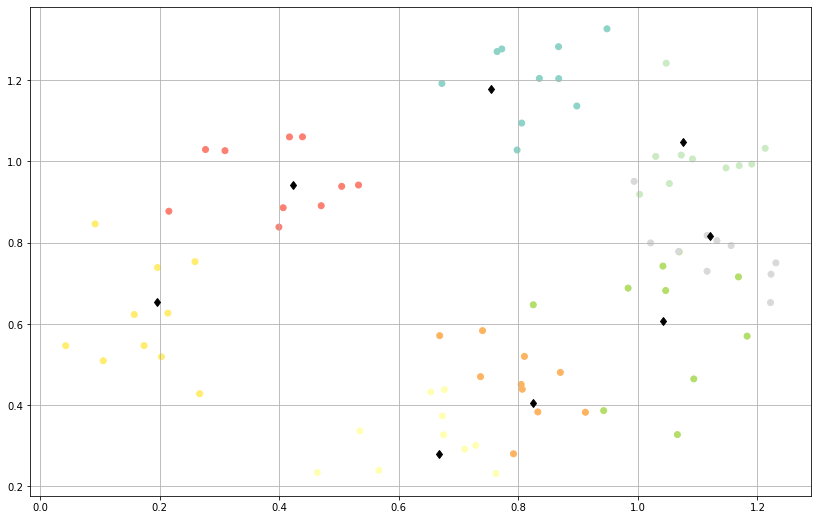

In [4]:
plt.figure(figsize=(14, 9))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set3')
plt.plot(centers[:,0], centers[:, 1], 'dk')
plt.grid(True)

Сконфигурируем и обучим сеть

In [5]:
def competlayer(clusters):
    return nl.net.newc([[0.0, 0.8],[0.0, 1.3]], clusters)

In [6]:
com_net = competlayer(8)
error = com_net.train(x, epochs = 250)

Epoch: 100; Error: 12.17597101501691;
Epoch: 200; Error: 11.44731311346804;
The maximum number of train epochs is reached


Визуализируем процесс обучения через значения ошибок

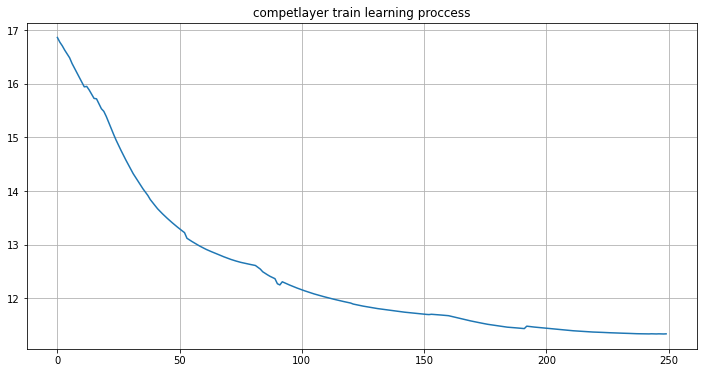

In [7]:
plt.figure(figsize=(12, 6))
plt.title('competlayer train learning proccess')
plt.plot(error)
plt.grid()

Визуализируем веса на первом слое - центры кластеров

In [8]:
trained_centers = com_net.layers[0].np['w']
trained_centers

array([[0.62622618, 0.39438381],
       [0.8404752 , 0.36374641],
       [1.09017742, 0.9556024 ],
       [0.40358348, 0.96736737],
       [1.00547475, 0.5906717 ],
       [0.85322444, 1.19968908],
       [1.13416687, 0.75003794],
       [0.17220665, 0.62689754]])

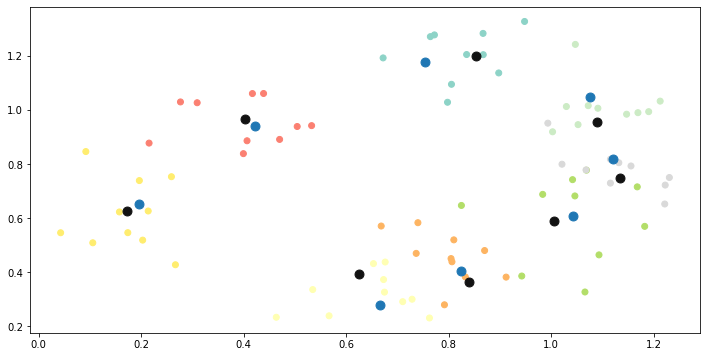

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set3')
plt.scatter(centers[:,0], centers[:, 1], s = 80, label="Centers")
plt.scatter(trained_centers[:,0], trained_centers[:,1], s = 80, label="Train centers", color='#121212')

plt.show()

Cоздадим 5 точек случайным образом

In [23]:
rand_points = np.array([[np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)],
                      [np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)],
                      [np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)],
                      [np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)],
                      [np.random.uniform(0, 1.5), np.random.uniform(0, 1.5)]])

Классифицируем их

In [24]:
predicted_points = com_net.sim(rand_points)
predicted_classes = np.argmax(predicted_points, axis=1)
print(predicted_points)
print(predicted_classes)

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]
[1 2 7 5 5]


In [25]:
rand_points

array([[0.84425727, 0.05200187],
       [0.97164136, 0.92937747],
       [0.2345997 , 0.62742205],
       [0.88165823, 1.02136958],
       [0.98549858, 1.42721675]])

Изобразим принадлженость точек своим центрам

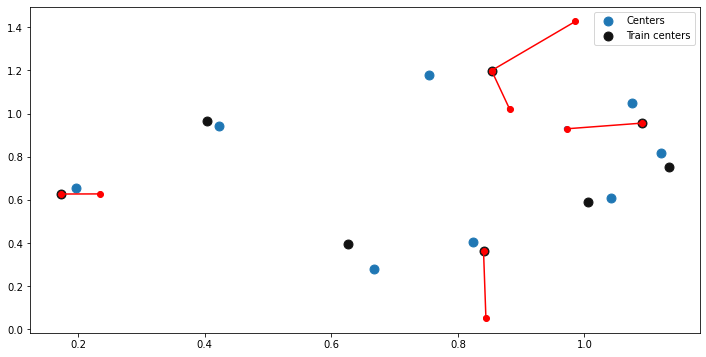

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(centers[:,0], centers[:, 1], s = 80, label="Centers")
plt.scatter(trained_centers[:,0], trained_centers[:,1], s = 80, label="Train centers", color='#121212')
plt.scatter(rand_points[:, 0], rand_points[:, 1], c=predicted_classes, cmap='Set1', marker='.', s=80)
for point, clas in zip(rand_points, predicted_classes):
    xs = [point[0], trained_centers[clas][0]]
    ys = [point[1], trained_centers[clas][1]]
    plt.plot(xs, ys, 'ro-')
plt.legend()
plt.show()

### Задание 2
 Построить и обучить карту Кохонена размера 2х4 с гексагональной сеткой, которая будет
содержать координаты центров кластеров

In [28]:
x2, y2, _ = nngenc(X, clusters, points, deviation)

Изобразим сформированные точки

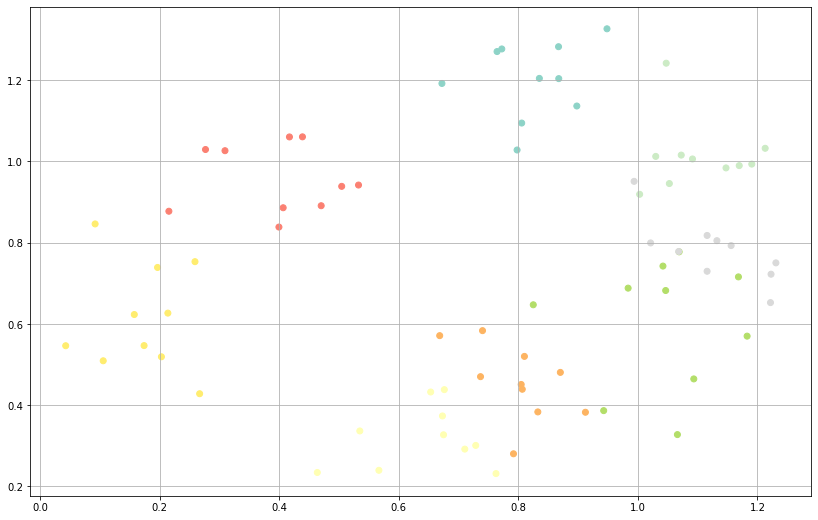

In [29]:
plt.figure(figsize=(14, 9))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap='Set3')
plt.grid(True)

Обучим сеть

In [33]:
#%pip install minisom
from minisom import MiniSom

som = MiniSom(2, 4, x2.shape[1], sigma=0.66, learning_rate=0.8, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
som.train(x2, 150, verbose=True)

 [ 150 / 150 ] 100% - 0:00:00 left 
 quantization error: 0.11365734712010758


In [36]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

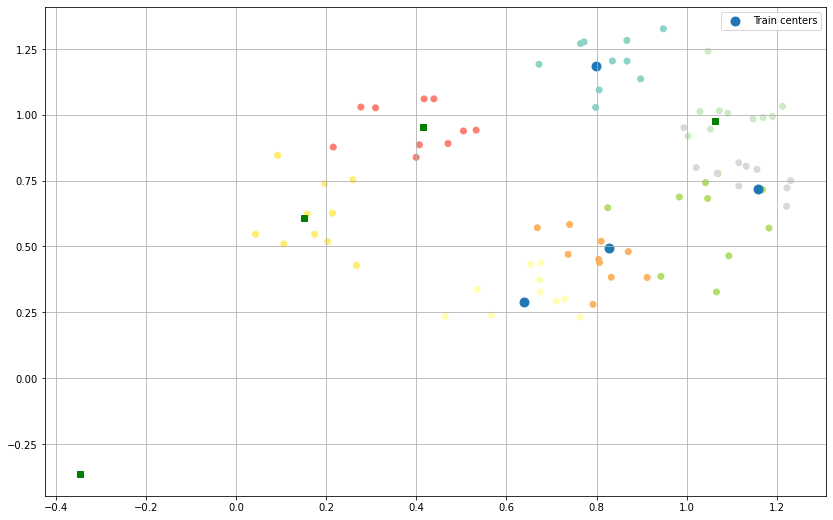

In [37]:
plt.figure(figsize=(14, 9))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap='Set3')
plt.scatter(weights[0][:,0], weights[0][:,1], s=80, label='Train centers')
plt.plot(weights[1][:,0], weights[1][:,1], 'gs')
plt.legend()
plt.grid(True)

### Задание 3
Построить и обучить карту Кохонена, которая будет находить одно из решений задачи коммивояжера.

Задача комивояжера - одна из самых известных задач комбинаторной оптимизации, заключающаяся в поиске самого выгодного маршрута, проходящего через указанные города хотя бы по одному разу с последующим возвратом в исходный город. В условиях задачи указываются критерий

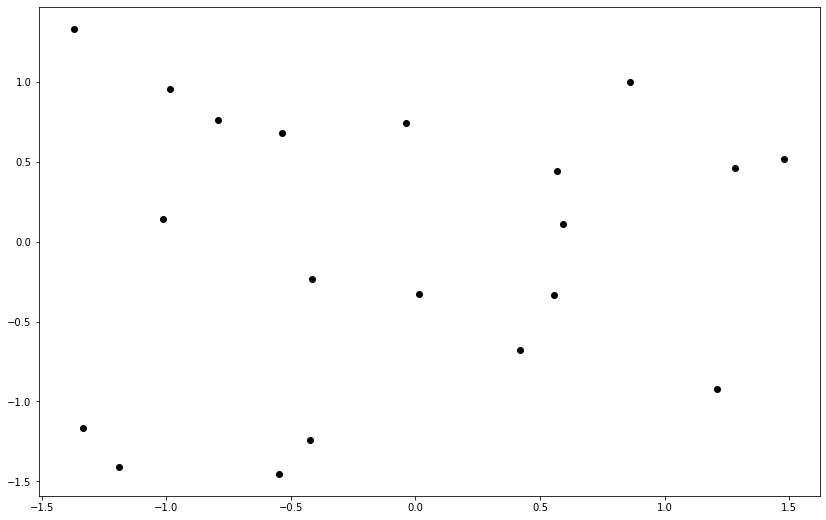

In [59]:
z = np.array([[np.random.uniform(-1.5, 1.5), np.random.uniform(-1.5, 1.5)] for _ in range(20)])

plt.figure(figsize=(14, 9))
plt.scatter(z[:, 0], z[:, 1], c='black');

Решаем задачу

D:\Programs\Anaconda\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


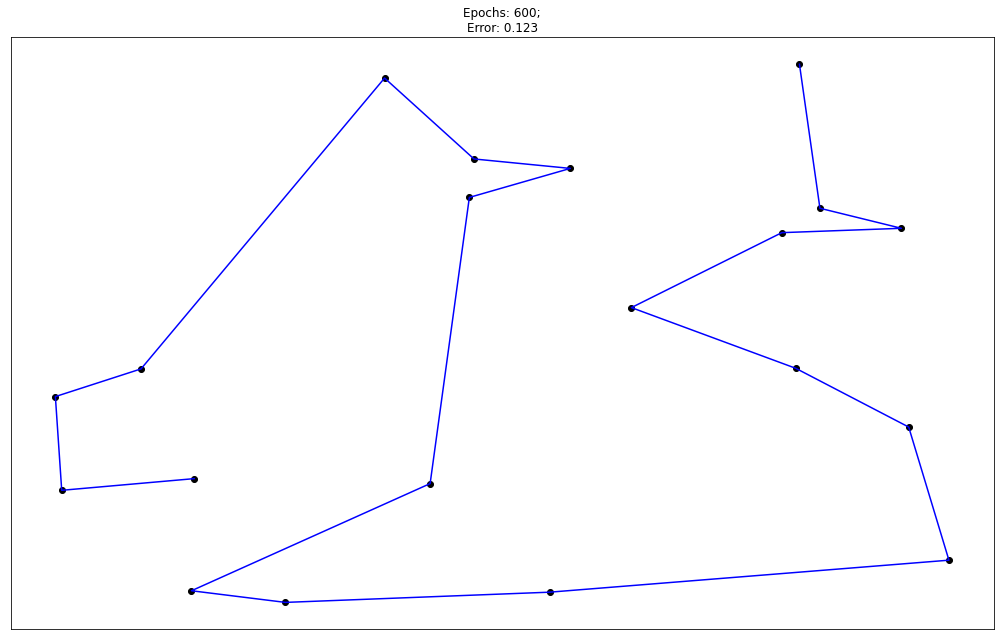

In [44]:
np.random.RandomState(10)
neurons = 80

som = MiniSom(1, neurons, z.shape[1], sigma=8, learning_rate=0.4,
              neighborhood_function='gaussian', random_seed=0)
som.random_weights_init(z)

plt.figure(figsize=(14, 9))
som.train(z, 600, verbose=False, random_order=False)
plt.scatter(z[:, 0], z[:, 1], c='black')
visit_order = np.argsort([som.winner(p)[1] for p in z])
#visit_order = np.concatenate((visit_order, [visit_order[0]]))
plt.plot(z[visit_order][:,0], z[visit_order][:,1], c='blue')
plt.title("Epochs: {i};\nError: {e:.3f}".format(i=iterations, 
                                                e=som.quantization_error(z)))
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

### Задание №4
Для обучающей выборки построить LVQ-сеть, которая будет правильно относить точки к
двум классам. Классы не являются линейно разделимыми. Отобразить границы классов, которые
построила сеть.

In [49]:
points = np.array([
    [-0.3, -0.3, -1.1, -1.1,  1.1,  0.5, 0,    0.2, -0.7, -0.3, 0.1, -0.3],
    [ 1.4,  0.3, -0.4,  0.7, -0.5, -0.7, 0.9, -0.5, -0.2, -0.5, 0.7, -0.3]
]).T

target = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

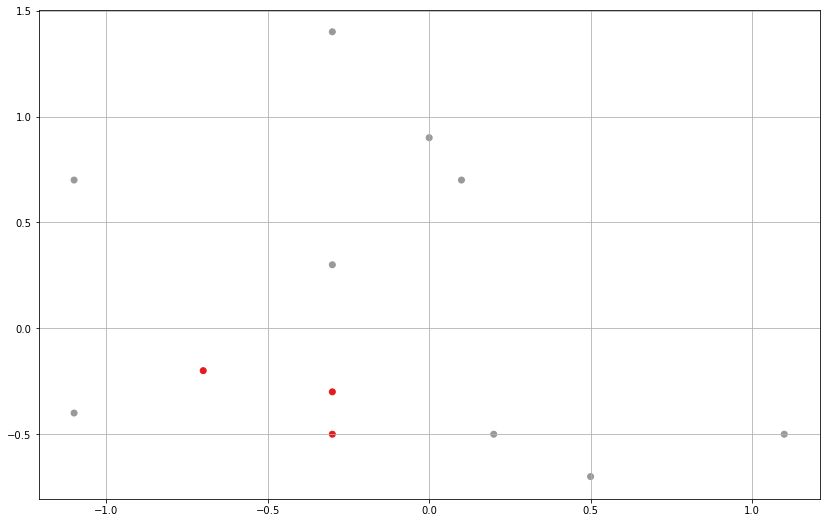

In [50]:
plt.figure(figsize=(14, 9))
plt.scatter(points[:, 0], points[:, 1], c=target, cmap='Set1')
plt.grid(True)

In [51]:
from neupy.algorithms import LVQ
lvqnet = LVQ(n_inputs=2, n_classes=2, step=0.1)
lvqnet.train(pointsT, target, epochs=300)

In [52]:
xx, yy = np.meshgrid(np.arange(-1.5, 1.51, 0.1), np.arange(-1.5, 1.51, 0.1))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
sample = np.concatenate((xx, yy), axis=1)

pred = lvqnet.predict(sample)

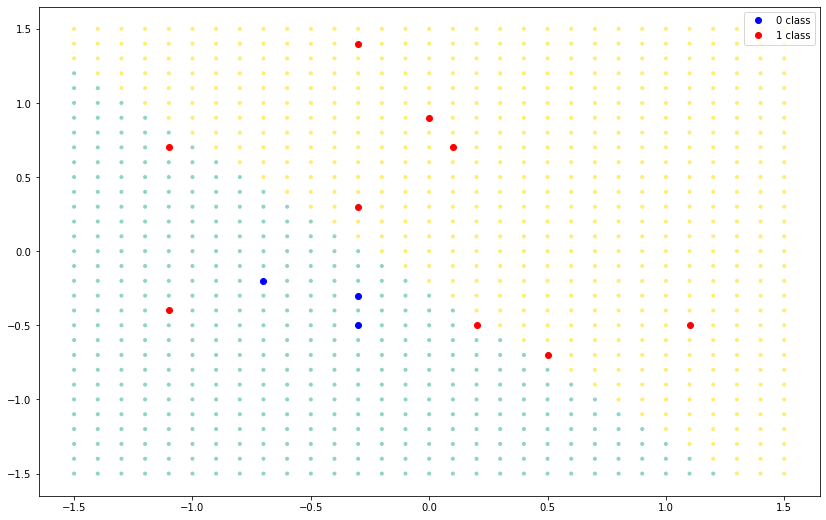

In [58]:
plt.figure(figsize=(14, 9))

plt.scatter(sample[:, 0], sample[:, 1], c=pred,
            cmap='Set3', marker=r'.')
plt.plot([points[i][0] for i in range(12) if target[i] == 0], 
         [points[i][1] for i in range(12) if target[i] == 0], 'bo', label='0 class')
plt.plot([points[i][0] for i in range(12) if target[i] == 1], 
         [points[i][1] for i in range(12) if target[i] == 1], 'ro', label='1 class');
plt.legend()
plt.show()

### Вывод

В лабораторной работе реализовали нейронную сеть Кохонена. Данная нейронная сеть эффективно работает на обучаем множестве большой размерности (в отличие от RBF).

Слой Кохонена эффективно решает задачу кластеризации образцов, то есть разделение образцов на группы (кластеры) по тем или иным признакам. В работе также был реализована самоорганизующаяся сеть Кохонена, которая вместо сдвига ближайшего к точке центра двигает центры сетки, которой покрывает SOFM обучающее множество. Наиболее сложным в данной лабораторной работе оказалась теоретическая база самоорганизующихся карт, так как до этого не приходилось встречаться с чем-то похожим.